# Update packages and Tools

In [ ]:
!pip install spicy --upgrade

In [ ]:
!pip install numba --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
!pip install numpy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
!pip install gensim --upgrade

Importing Necesaary Packages & Libraries

# 1.0 Necessary Libraries and Dataset

In [118]:
#Import resource from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Import necessary Libraries Dtasets

In [119]:
import pandas as pd


# Natural Language Tookit

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('omw-1.4')

# Keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Scikit-learn

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Some necessary packages
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime




# # Warnings and set the logs
# import warnings
# warnings.filterwarnings('ignore')
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 1.2 Importing Dataset

In [120]:
#Import the dataset from the Google Drive
twitter_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Twitter_Data.csv')
twitter_data1 = twitter_data
# Print the first five sentence
twitter_data.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [121]:
#Remove neutral comments in order to perform analysis to Negative and positive sentiment
twitter_data  = twitter_data[twitter_data.category != 0.0]

In [122]:
twitter_data.drop_duplicates()
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107767 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  107765 non-null  object 
 1   category    107760 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# 2 Data Pre-pocessing

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords, wordnet
import matplotlib.pyplot as plt
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.1 Variables for Data- Prepocessing

In [124]:
# Varaible for the dataset
ColumnOfData = ["clean_text", "category"]
EncodingData = "ISO-8859-1"
SizeOfTraining = 0.8


POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
Sentment_Thresholds = (0.4, 0.7)





## 2.2 Find the Values that are null

In [125]:
def drop_null_rows(data):
    print("Before dropping null rows:")
    print(data.isnull().sum())
    data.dropna(how='any', inplace=True)
    print("After dropping null rows:")
    print(data.isnull().sum())

drop_null_rows(twitter_data)


Before dropping null rows:
clean_text    2
category      7
dtype: int64
After dropping null rows:
clean_text    0
category      0
dtype: int64


<ipython-input-125-04408588f495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='any', inplace=True)


In [126]:
# Delete the positive label and keep the balance between positive and negative
twitter_data = pd.DataFrame(twitter_data)
n_rows = len(twitter_data.index)
n_delete = int(n_rows / 2.94)
twitter_data = twitter_data.drop(twitter_data[twitter_data['category'] == 1.0].sample(n=n_delete).index)


## 2.3 Encode the label and Distribution of Dataset Labels

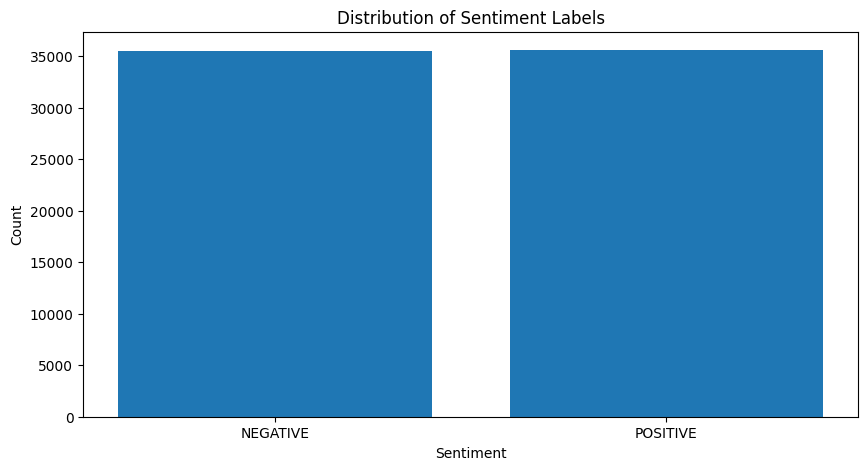

In [127]:
def visualize_sentiment_distribution(data, label_mapping):
    def encode_sentiment_label(label):
        return label_mapping[int(label)]

    data.category = data.category.apply(lambda x: encode_sentiment_label(x))

    label_counts = Counter(data.category)

    plt.figure(figsize=(10, 5))
    plt.bar(label_mapping.values(), label_counts.values())
    plt.title("Distribution of Sentiment Labels")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

label_mapping = {-1.0: "NEGATIVE", 1.0: "POSITIVE"}
visualize_sentiment_distribution(twitter_data, label_mapping)


## 2.4 Text Cleaning and Structuring

### Remove URLs, HTML tags and entities


In [128]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags and entities
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+', '', text)

    return text

# Apply the preprocessing function to the 'clean_text' column
twitter_data['mod_text'] = twitter_data['clean_text'].apply(preprocess_text)





### Remove emoticons, special symbols, punctuation and non-alphanumeric characters

In [129]:
def preprocess_text(text):
    # Remove emoticons and special symbols
    emo_pattern = r'[' + u'\U0001F600-\U0001F64F' + u'\U0001F300-\U0001F5FF' + u'\U0001F680-\U0001F6FF' + \
                  u'\U0001F1E0-\U0001F1FF' + u'\U00002702-\U000027B0' + u'\U000024C2-\U0001F251' + ']+'
    text = re.sub(emo_pattern, '', text, flags=re.UNICODE)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)

    return text

# Apply the preprocessing function to the 'clean_text' column
twitter_data['mod_text'] = twitter_data['clean_text'].apply(preprocess_text)
twitter_data.head()


,clean_text,category,mod_text
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...
9,gandhi was gay does modi,POSITIVE,gandhi was gay does modi
15,vote such party and leadershipwho can take fas...,NEGATIVE,vote such party and leadershipwho can take fas...


### Tokenizing the tweet test

In [130]:
# Tokenizing the tweet test

# twitter_data['tokenized'] = twitter_data['mod_text'].apply(word_tokenize)

# twitter_data.head()

# import nltk
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

# Apply the tokenization function to the 'mod_text' column
twitter_data['tokenized'] = twitter_data['mod_text'].apply(tokenize_text)
twitter_data.head()


,clean_text,category,mod_text,tokenized
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu..."
9,gandhi was gay does modi,POSITIVE,gandhi was gay does modi,"[gandhi, was, gay, does, modi]"
15,vote such party and leadershipwho can take fas...,NEGATIVE,vote such party and leadershipwho can take fas...,"[vote, such, party, and, leadershipwho, can, t..."


### Lower words of all the text

In [131]:
#

# twitter_data['lower'] = twitter_data['tokenized'].apply(
#     lambda x: [word.lower() for word in x])


def convert_to_lower(token_list):
    return [word.lower() for word in token_list]

# Apply the convert_to_lower function to the 'tokenized' column
twitter_data['lower'] = twitter_data['tokenized'].apply(convert_to_lower)



### Remove Stopwords

In [132]:
def setup_nltk():
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')

    stopwords_list = set(stopwords.words("english"))
    stopwords_list.remove('not')
    additional_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords_list = stopwords_list.union(additional_stopwords)
    stemmer = SnowballStemmer("english")

    return stopwords_list, stemmer

stopwords_list, stemmer = setup_nltk()


def remove_stopwords(token_list):
    return [word for word in token_list if word not in stopwords_list]

# Apply the remove_stopwords function to the 'lower' column
twitter_data['stopwords_removed'] = twitter_data['lower'].apply(remove_stopwords)

# Display the updated DataFrame
twitter_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_text,category,mod_text,tokenized,lower,stopwords_removed
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today..."
9,gandhi was gay does modi,POSITIVE,gandhi was gay does modi,"[gandhi, was, gay, does, modi]","[gandhi, was, gay, does, modi]","[gandhi, gay, modi]"
15,vote such party and leadershipwho can take fas...,NEGATIVE,vote such party and leadershipwho can take fas...,"[vote, such, party, and, leadershipwho, can, t...","[vote, such, party, and, leadershipwho, can, t...","[vote, party, leadershipwho, take, fast, firm,..."


In [133]:
# # Use part of speech tags

# # twitter_data['pos_tags'] = twitter_data['stopwords_removed'].apply(nltk.tag.pos_tag)

# # twitter_data.head()

# def get_pos_tags(token_list):
#     return nltk.tag.pos_tag(token_list)

# # Apply the get_pos_tags function to the 'stopwords_removed' column
# twitter_data['pos_tags'] = twitter_data['stopwords_removed'].apply(get_pos_tags)

# # Display the updated DataFrame
# twitter_data.head()


In [134]:
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN


# twitter_data['wordnet_pos'] = twitter_data['pos_tags'].apply(
#     lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# twitter_data.head()

### Using Part_of_speech(POS) Tagging

In [135]:
def get_pos_tags(token_list):
    return nltk.tag.pos_tag(token_list)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Apply the get_pos_tags function to the 'stopwords_removed' column
twitter_data['pos_tags'] = twitter_data['stopwords_removed'].apply(get_pos_tags)

# Apply the get_wordnet_pos function to the 'pos_tags' column
twitter_data['wordnet_pos'] = twitter_data['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# Display the updated DataFrame
twitter_data.head()



,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove..."
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c..."
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl..."
9,gandhi was gay does modi,POSITIVE,gandhi was gay does modi,"[gandhi, was, gay, does, modi]","[gandhi, was, gay, does, modi]","[gandhi, gay, modi]","[(gandhi, NN), (gay, NN), (modi, NN)]","[(gandhi, n), (gay, n), (modi, n)]"
15,vote such party and leadershipwho can take fas...,NEGATIVE,vote such party and leadershipwho can take fas...,"[vote, such, party, and, leadershipwho, can, t...","[vote, such, party, and, leadershipwho, can, t...","[vote, party, leadershipwho, take, fast, firm,...","[(vote, NN), (party, NN), (leadershipwho, JJ),...","[(vote, n), (party, n), (leadershipwho, a), (t..."


In [136]:
# Use lemmatizer.

# wordNetLem = WordNetLemmatizer()

# twitter_data['lemmatized'] = twitter_data['wordnet_pos'].apply(
#     lambda x: [wordNetLem.lemmatize(word, tag) for word, tag in x])

# twitter_data['lemmatized'] = twitter_data['lemmatized'].apply(
#     lambda x: [word for word in x if word not in stpw])

# twitter_data['lemma_str'] = [' '.join(map(str, l)) for l in twitter_data['lemmatized']]

# twitter_data.head()

In [137]:
# print("Total Rows =", len(twitter_data.clean_text))

In [138]:
# twitter_data.head()

### Using lemmatizer.

In [139]:
wordNetLem = WordNetLemmatizer()

def lemmatize_and_remove_stopwords(tagged_words):
    lemmatized_words = [wordNetLem.lemmatize(word, tag) for word, tag in tagged_words]
    non_stopwords = [word for word in lemmatized_words if word not in stopwords_list]
    return non_stopwords

twitter_data['lemmatized'] = twitter_data['wordnet_pos'].apply(lemmatize_and_remove_stopwords)

twitter_data['lemma_str'] = [' '.join(map(str, l)) for l in twitter_data['lemmatized']]

print("Total Rows =", len(twitter_data.clean_text))

twitter_data.head()


Total Rows = 71106


,clean_text,category,mod_text,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,when modi promised “minimum government maximum...,NEGATIVE,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...","[when, modi, promised, minimum, government, ma...","[modi, promised, minimum, government, maximum,...","[(modi, NNS), (promised, VBD), (minimum, JJ), ...","[(modi, n), (promised, v), (minimum, a), (gove...","[modi, promise, minimum, government, maximum, ...",modi promise minimum government maximum govern...
3,asking his supporters prefix chowkidar their n...,POSITIVE,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...","[asking, his, supporters, prefix, chowkidar, t...","[asking, supporters, prefix, chowkidar, names,...","[(asking, VBG), (supporters, NNS), (prefix, VB...","[(asking, v), (supporters, n), (prefix, v), (c...","[ask, supporter, prefix, chowkidar, name, modi...",ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,POSITIVE,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...","[answer, who, among, these, the, most, powerfu...","[answer, among, powerful, world, leader, today...","[(answer, NN), (among, IN), (powerful, JJ), (w...","[(answer, n), (among, n), (powerful, a), (worl...","[answer, among, powerful, world, leader, today...",answer among powerful world leader today trump...
9,gandhi was gay does modi,POSITIVE,gandhi was gay does modi,"[gandhi, was, gay, does, modi]","[gandhi, was, gay, does, modi]","[gandhi, gay, modi]","[(gandhi, NN), (gay, NN), (modi, NN)]","[(gandhi, n), (gay, n), (modi, n)]","[gandhi, gay, modi]",gandhi gay modi
15,vote such party and leadershipwho can take fas...,NEGATIVE,vote such party and leadershipwho can take fas...,"[vote, such, party, and, leadershipwho, can, t...","[vote, such, party, and, leadershipwho, can, t...","[vote, party, leadershipwho, take, fast, firm,...","[(vote, NN), (party, NN), (leadershipwho, JJ),...","[(vote, n), (party, n), (leadershipwho, a), (t...","[vote, party, leadershipwho, take, fast, firm,...",vote party leadershipwho take fast firm action...


In [140]:
# twitter_data_new = twitter_data[["lemma_str", "category"]]
# twitter_data_new.head()

## 2.5 Split the Train and Test dataset

In [141]:
# twitter_data_train, twitter_data_test = train_test_split(twitter_data_new, test_size=1- SizeOfTraining, random_state=42)
# print("TRAIN size:", len(twitter_data_train))
# print("TEST size:", len(twitter_data_test))

In [142]:
twitter_data_new = twitter_data[["lemma_str", "category"]]
twitter_data_train, twitter_data_test = train_test_split(twitter_data_new, test_size=1 - SizeOfTraining, random_state=42)

print("TRAIN DATASET SIZE:", len(twitter_data_train))
print("TEST DATASET SIZE:", len(twitter_data_test))

twitter_data_train.head(), twitter_data_test.head()


TRAIN DATASET SIZE: 56884
TEST DATASET SIZE: 14222


(                                               lemma_str  category
 85249  honble karnataka head puppet kindly plz tell w...  POSITIVE
 60818  watch irani mimic modi amethi well stand world...  POSITIVE
 69                     new india vote shri narendra modi  POSITIVE
 71634  mrnarayana root make congress rip fruit modi n...  NEGATIVE
 38442  rahul gandhi side modi like compare err sorry ...  NEGATIVE,
                                                 lemma_str  category
 51546   hypocrite modi talk swachch bharat go litter s...  NEGATIVE
 117622  father never vote till say voting modi succeed...  POSITIVE
 115524  gov clearly idea unity diversity actively unde...  POSITIVE
 65237   year old tejasvi surya candidate bangalore sou...  NEGATIVE
 118002  modi electrify 100 village india many doubt na...  NEGATIVE)

##2.6 Dataset Word Cloud Analysis

In [143]:
# Packages for WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict


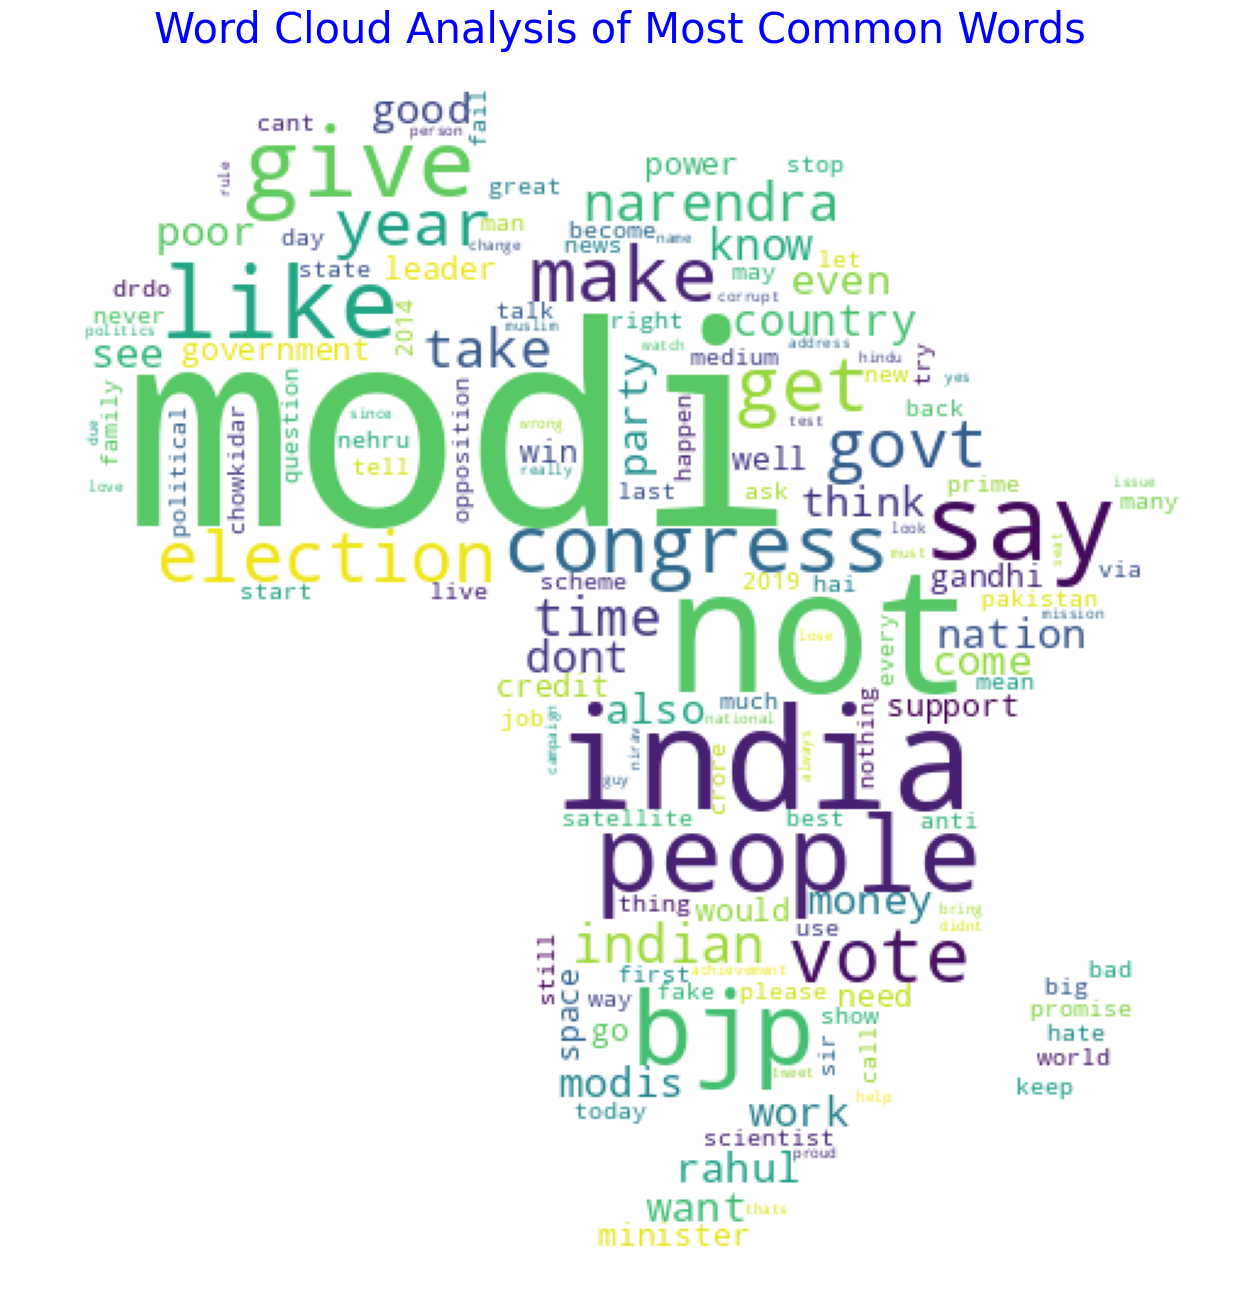

In [144]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.probability import FreqDist

def plot_wordcloud(words, mask, title, title_size, figure_size=(18.0, 13.0), image_color=False):
    all_words = [word for wordlist in words for word in wordlist]
    most_common = FreqDist(all_words).most_common(150)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=150,
        max_font_size=115,
        random_state=42,
        mask=mask,
    ).generate_from_frequencies(dict(most_common))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()
    plt.show()
#Applay the mask from the Google Drive
comments_mask = np.array(Image.open('drive/MyDrive/Colab Notebooks/mask.webp'))
plot_wordcloud(twitter_data['lemmatized'], comments_mask,
               'Word Cloud Analysis of Most Common Words',
               title_size=30)



# 3: Use Word2Vec for dataset nalysis

In [145]:
# Import Word2vec Package
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#  Parameter of  Word2Vec Training
SizeOfW2V = 300
WindowOfW2V = 5
EpochOfW2V = 32
MinCountOfW2V = 10

## 3.1 Create Corpus，Word2Vec Model and also create Vocab ## 3.4 Train and Test Word2Vec Model

In [146]:
def find_similar_words(word, model, documents, epochs):
    model.build_vocab(documents)
    model.train(documents, total_examples=len(documents), epochs=epochs)
    similar_words = model.wv.most_similar(word)
    return similar_words
model_Word2Vec = None
def main():
    global model_Word2Vec  # Declare the global variable

    documents = [text.split() for text in twitter_data_train.lemma_str]
    vector_size = SizeOfW2V
    window = WindowOfW2V
    min_count = MinCountOfW2V
    workers = WorkersOfW2V
    sg = 0

    model_Word2Vec = train_word2vec_model(documents, vector_size, window, min_count, workers, sg)

    word_Word2Vec = model_Word2Vec.wv.key_to_index.keys()
    vocab_size_Word2Vec = len(word_Word2Vec)
    print("Vocab size:", vocab_size_Word2Vec)

    similar_words = find_similar_words("bjp", model_Word2Vec, documents, EpochOfW2V)
    print(similar_words)

if __name__ == "__main__":
    main()








# def main():
#     documents = [text.split() for text in twitter_data_train.lemma_str]
#     vector_size = SizeOfW2V
#     window = WindowOfW2V
#     min_count = MinCountOfW2V
#     workers = 8
#     sg = 0

#     model_Word2Vec = train_word2vec_model(documents, vector_size, window, min_count, workers, sg)

#     word_Word2Vec = model_Word2Vec.wv.key_to_index.keys()
#     vocab_size_Word2Vec = len(word_Word2Vec)
#     print("Vocab size:", vocab_size_Word2Vec)

#     similar_words = find_similar_words("bjp", model_Word2Vec, documents, EpochOfW2V)
#     print(similar_words)

# if __name__ == "__main__":
#     main()


NameError: ignored

In [ ]:
# model_Word2Vec = None
# documents= None

# def train_word2vec_model(documents, vector_size, window, min_count, workers, sg):
#     model = gensim.models.word2vec.Word2Vec(vector_size=vector_size,
#                                             window=window,
#                                             min_count=min_count,
#                                             workers=workers,
#                                             sg=sg)
#     model.build_vocab(documents)
#     model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
#     return model

# def main():
#     documents = [text.split() for text in twitter_data_train.lemma_str]
#     vector_size = SizeOfW2V
#     window = WindowOfW2V
#     min_count = MinCountOfW2V
#     workers = 8
#     sg = 0

#     model_Word2Vec = train_word2vec_model(documents, vector_size, window, min_count, workers, sg)

#     word_Word2Vec = model_Word2Vec.wv.key_to_index.keys()
#     vocab_size_Word2Vec = len(word_Word2Vec)
#     print("Vocab size:", vocab_size_Word2Vec)

# if __name__ == "__main__":
#     main()


## 3.4 Train and Test Word2Vec Model

In [ ]:
# def find_similar_words(word, model, documents, epochs):
#     model.build_vocab(documents)
#     model.train(documents, total_examples=len(documents), epochs=epochs)
#     similar_words = model.wv.most_similar(word)
#     return similar_words

# similar_words = find_similar_words("bjp", model_Word2Vec, documents, EpochOfW2V)
# print(similar_words)


# 4 Sentiment Analysis of Bi-LSTM

In [ ]:

# Keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Scikit-learn

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Parameters for KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 1
BATCH_SIZE = 1024

##4.1 Token Create Vocab and Encode the Label

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your constants
SEQUENCE_LENGTH = 100
NEUTRAL = 'neutral'
SizeOfW2V = 300  # Change this to the actual size of your Word2Vec embeddings

# Define your data and model_Word2Vec
twitter_data_train = twitter_data_train   # Your training data
twitter_data_test =twitter_data_test    # Your testing data
model_Word2Vec = ...       # Your Word2Vec model

# Tokenizer and Vocabulary
tokenizer = Tokenizer()

def calculate_vocab_size(data):
    tokenizer.fit_on_texts(data.lemma_str)
    vocab_size = len(tokenizer.word_index) + 1
    return vocab_size

size_of_vocab = calculate_vocab_size(twitter_data_train)
print("Total words:", size_of_vocab)

# Prepare data
def prepare_data(tokenizer, train_data, test_data, sequence_length, neutral_label):
    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.lemma_str), maxlen=sequence_length)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.lemma_str), maxlen=sequence_length)

    labeling_data = train_data.category.unique().tolist()
    labeling_data.append(neutral_label)

    return x_train, x_test, labeling_data

x_dataset_train, x_dataset_test, labeling_data = prepare_data(tokenizer, twitter_data_train, twitter_data_test, SEQUENCE_LENGTH, NEUTRAL)

# Encode labels
def encode_labels(train_labels, test_labels):
    encoder = LabelEncoder()
    encoder.fit(train_labels)

    y_train = encoder.transform(train_labels)
    y_test = encoder.transform(test_labels)

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    return y_train, y_test, encoder

y_dataset_train, y_dataset_test, label_encoder = encode_labels(twitter_data_train.category.tolist(), twitter_data_test.category.tolist())

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, SizeOfW2V))

for word, i in tokenizer.word_index.items():
    if word in model_Word2Vec.wv:
        embedding_matrix[i] = model_Word2Vec.wv[word]

lstm_embedding_layer = Embedding(vocab_size, SizeOfW2V, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

# Create BiLSTM model
def create_bilstm_model(embedding_layer, lstm_units):
    model = Sequential()
    model.add(embedding_layer)
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    return model

bilstm_model = create_bilstm_model(lstm_embedding_layer, lstm_units=100)
bilstm_model.summary()



In [ ]:
# def prepare_data(tokenizer, train_data, test_data, sequence_length, neutral_label):
#     x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.lemma_str), maxlen=sequence_length)
#     x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.lemma_str), maxlen=sequence_length)

#     labeling_data = train_data.category.unique().tolist()
#     labeling_data.append(neutral_label)

#     return x_train, x_test, labeling_data

# x_dataset_train, x_dataset_test, labeling_data = prepare_data(tokenizer, twitter_data_train, twitter_data_test, SEQUENCE_LENGTH, NEUTRAL)



In [ ]:
# def encode_labels(encoder, train_labels, test_labels):
#     y_train = encoder.transform(train_labels)
#     y_test = encoder.transform(test_labels)

#     y_train = y_train.reshape(-1, 1)
#     y_test = y_test.reshape(-1, 1)

#     return y_train, y_test

# y_dataset_train, y_dataset_test = encode_labels(encode_data, twitter_data_train.category.tolist(), twitter_data_test.category.tolist())


##4.3 Create Embeding Layer and Bi-LSTM Model

In [ ]:
# import numpy as np

# # Assuming you have defined tokenizer, model_Word2Vec, and SizeOfW2V

# vocab_size = len(tokenizer.word_index) + 1
# embedding_size = SizeOfW2V
# embedding_matrix = np.zeros((vocab_size, embedding_size))

# for word, i in tokenizer.word_index.items():
#     if word in model_Word2Vec.wv:
#         embedding_matrix[i] = model_Word2Vec.wv[word]

# lstm_embedding_matrix = embedding_matrix


In [ ]:
# def create_embedding_matrix(tokenizer, word2vec_model, embedding_size):
#     vocab_size = len(tokenizer.word_index) + 1
#     embedding_matrix = np.zeros((vocab_size, embedding_size))

#     for word, i in tokenizer.word_index.items():
#         if word in word2vec_model.wv:
#             embedding_matrix[i] = word2vec_model.wv[word]

#     return embedding_matrix

# lstm_embedding_matrix = create_embedding_matrix(tokenizer, model_Word2Vec, SizeOfW2V)


In [ ]:
def create_bilstm_model(embedding_layer, lstm_units):
    model = Sequential()
    model.add(embedding_layer)
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    return model

bilstm_model = create_bilstm_model(bilstm_embedding_layer, lstm_units=100)
bilstm_model.summary()


##4.5 Comoile Bi-LSTM Model, create Callback and Train Bi-LSTM Model

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Compile the model
optimizer = SGD()  #  replace with Adam optimizer
bilstm_model.compile(loss='binary_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)
bilstm_callbacks = [reduce_lr, early_stopping]

# Train the model
bilstm_history = bilstm_model.fit(x_dataset_train, y_dataset_train,
                                  batch_size=BATCH_SIZE,
                                  epochs=EPOCHS,
                                  validation_split=0.1,
                                  verbose=1,
                                  callbacks=bilstm_callbacks)

model_score = bilstm_model.evaluate(x_dataset_test, y_dataset_test, batch_size=BATCH_SIZE)

print("\nModel Evaluation:")
print(f"Accuracy: {model_score[1]:.4f}")
print(f"Loss: {model_score[0]:.4f}")


##4.6 Predicate using Bi-LSTM_Model

In [ ]:
def decode_sentiment(score, include_neutral=True):
    label = NEUTRAL if include_neutral else NEGATIVE
    if score <= Sentment_Thresholds[0]:
        label = NEGATIVE
    elif score >= Sentment_Thresholds[1]:
        label = POSITIVE

    return label

def analyze_sentiment(clean_text, include_neutral=True):
    x_test_data = pad_sequences(tokenizer.texts_to_sequences([clean_text]), maxlen=SEQUENCE_LENGTH)

    score = bilstm_model.predict([x_test_data])[0]

    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score)}



In [ ]:
analyze_sentiment("I love the music")

In [ ]:
analyze_sentiment("i am lost")

In [ ]:
analyze_sentiment("My experience is bad")

##4.7 Create Confusing Methrix

In [ ]:
# predict sentiment labels for the test dataset using the trained Bi-LSTM model and decodes sentiment scores to obtain predicted labels.
y_dataset_pred = []
y_dataset_test = list(twitter_data_test.category)
scores = bilstm_model.predict(x_dataset_test, verbose=1, batch_size=8000)
y_dataset_pred = [decode_sentiment(score, include_neutral=False) for score in scores]

In [ ]:
#this function takes the confusion matrix, class labels, and an optional title as input and generates a visual representation of the confusion matrix with labeled axes and color coding
def plot_confusion_matrix(confusion_matrix, class_labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    plt.imshow(normalized_confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()

    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    fmt = '.2f'
    thresh = normalized_confusion_matrix.max() / 2.
    for i, j in itertools.product(range(normalized_confusion_matrix.shape[0]), range(normalized_confusion_matrix.shape[1])):
        plt.text(j, i, format(normalized_confusion_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if normalized_confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=15)
    plt.tight_layout()


#plot a confusion matrix using the provided class labels ("NEGATIVE" and "POSITIVE") and the confusion matrix computed from the model's predictions on the test dataset.
class_labels = ["NEGATIVE", "POSITIVE"]
conf_matrix = confusion_matrix(y_dataset_test, y_dataset_pred)
plot_confusion_matrix(conf_matrix, class_labels, title="Confusion Matrix")
plt.show()



##4.8 Report of Classification

In [ ]:
from sklearn.metrics import classification_report

class_labels = ["NEGATIVE", "POSITIVE"]
report = classification_report(y_dataset_test, y_dataset_pred, target_names=class_labels)

print("Classification Report:\n", report)


##4.9 Score of Accurancy

In [ ]:
accuracy_score(y_dataset_test, y_dataset_pred)

##4.10 Save The Bi-LSTM MODEL

In [ ]:
# Save models and data using joblib
import joblib
# Variables for save the model
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

joblib.dump(bilstm_model, KERAS_MODEL)
joblib.dump(model_Word2Vec, WORD2VEC_MODEL)
joblib.dump(tokenizer, TOKENIZER_MODEL)
joblib.dump(encode_data, ENCODER_MODEL)
